In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

C:\Users\Hannah\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Skip until "Start Here"

In [2]:
dataset_dir = "C:/Users/Hannah/OneDrive/Documents/MIDS/207/Final_Project/mids_207_final_project/"
img_height = 32
img_width = 32
batch_size = 500

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "train",
  validation_split=0.2,
  subset="training",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)
train_ds

Found 100000 files belonging to 2 classes.
Using 80000 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "train",
  validation_split=0.2,
  subset="validation",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 100000 files belonging to 2 classes.
Using 20000 files for validation.


In [132]:
classes = train_ds.class_names
classes

['FAKE', 'REAL']

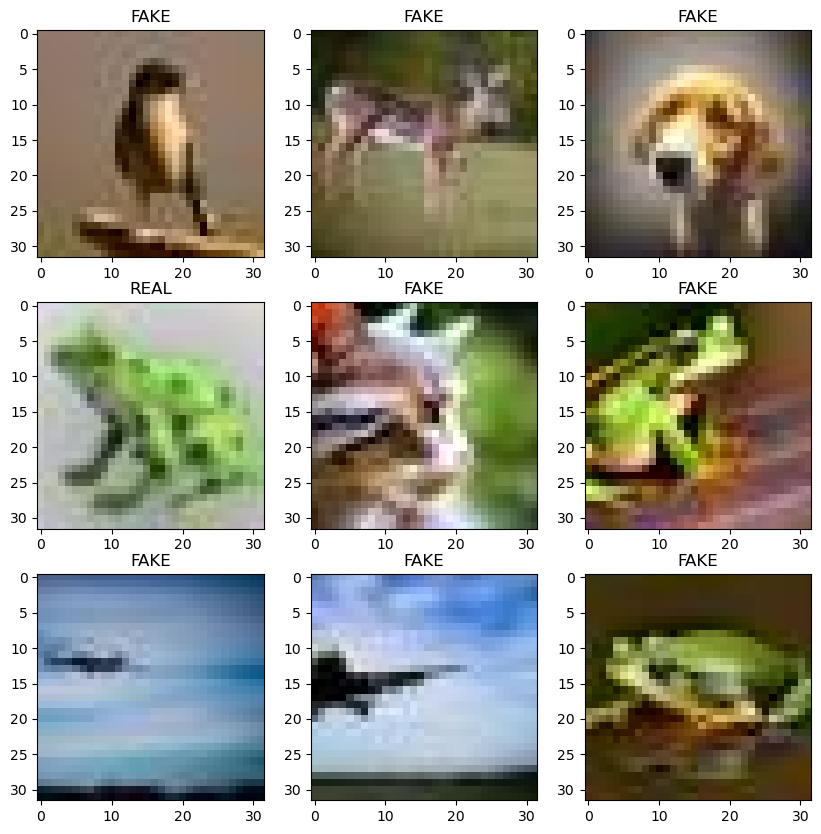

In [5]:
#first 9 images in training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    

In [6]:
#Rescaling images
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [7]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# The pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9725491


<_TakeDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
alist = list(train_ds)

# Start Here

# Load data

Loading it differently for Random Forest so that it is loaded in 1 batch

In [2]:
dataset_dir = "C:/Users/Hannah/OneDrive/Documents/MIDS/207/Final_Project/mids_207_final_project/"
img_height = 32
img_width = 32
batch_size = 500
train_ds_rf = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "train",
  validation_split=0.2,
  subset="training",
  seed = 512,
  image_size = (img_height, img_width), 
  batch_size = 80000)
train_ds_rf

Found 100000 files belonging to 2 classes.
Using 80000 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [3]:
val_ds_rf = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "train",
  validation_split=0.2,
  subset="validation",
  seed = 512,
  image_size = (img_height, img_width), 
  batch_size = 20000)
val_ds_rf

Found 100000 files belonging to 2 classes.
Using 20000 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Converting Prefetched Datasets to numpy ndarrays to use in scikit-learn Random Forest Classifier

In [4]:
rf_train_list = list(train_ds_rf)

In [5]:
train_imgs = rf_train_list[0][0].numpy()
train_labels = rf_train_list[0][1].numpy()

In [6]:
norm_train_imgs = train_imgs/255.0
norm_train_imgs.shape

(80000, 32, 32, 3)

In [7]:
rf_val_list = list(val_ds_rf)
val_imgs = rf_val_list[0][0].numpy()
val_labels = rf_val_list[0][1].numpy()

In [8]:
norm_val_imgs = val_imgs/255.0
norm_val_imgs.shape

(20000, 32, 32, 3)

In [9]:
nsamples, nx, ny, nrgb = norm_train_imgs.shape
norm_train_imgs2 = norm_train_imgs.reshape((nsamples,nx*ny*nrgb))
norm_train_imgs2.shape

(80000, 3072)

In [10]:
nsamplesv, nxv, nyv, nrgbv = norm_val_imgs.shape
norm_val_imgs2 = norm_val_imgs.reshape((nsamplesv,nxv*nyv*nrgbv))
norm_val_imgs2.shape

(20000, 3072)

# EDA

In [12]:
classes = train_ds_rf.class_names
classes

['FAKE', 'REAL']

In [13]:
train_wordlabels = [classes[i] for i in train_labels]

In [14]:
label_counts = [train_wordlabels.count('REAL'),  train_wordlabels.count('FAKE')]
label_counts

[39985, 40015]

Text(0, 0.5, 'Count')

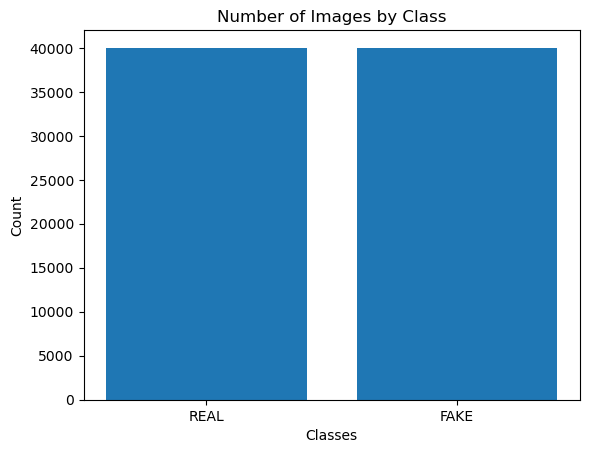

In [15]:
plt.bar(['REAL', 'FAKE'], label_counts)
plt.title("Number of Images by Class")
plt.xlabel("Classes")
plt.ylabel("Count")

In [16]:
real_imgs = train_imgs[train_labels == 1]
fake_imgs = train_imgs[train_labels == 0]
real_imgs.shape, fake_imgs.shape

((39985, 32, 32, 3), (40015, 32, 32, 3))

In [17]:
realimg_R = real_imgs[:,:,:,0].flatten()
realimg_G = real_imgs[:,:,:,1].flatten()
realimg_B = real_imgs[:,:,:,2].flatten()
realimg_R.shape

(40944640,)

In [18]:
fakeimg_R = fake_imgs[:,:,:,0].flatten()
fakeimg_G = fake_imgs[:,:,:,1].flatten()
fakeimg_B = fake_imgs[:,:,:,2].flatten()
fakeimg_R.shape

(40975360,)

[Text(0.5, 0, 'RGB Value'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Fake Images RGB')]

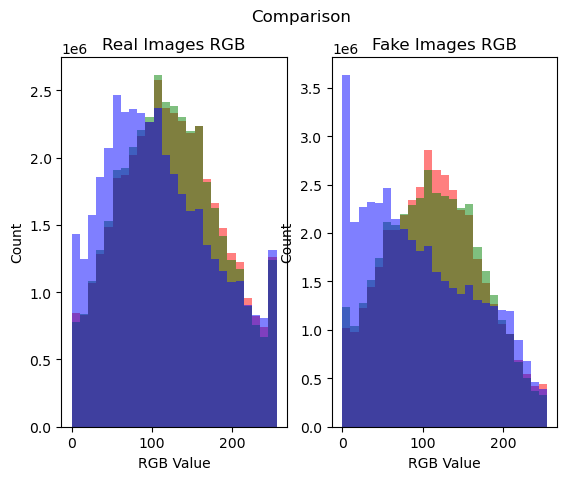

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison')

my_alpha=0.5
ax1.hist(realimg_R, bins=25, color='red', alpha=my_alpha)
ax1.hist(realimg_G, bins=25, color='green', alpha=my_alpha)
ax1.hist(realimg_B, bins=25, color='blue', alpha=my_alpha)
ax1.set(xlabel='RGB Value', ylabel='Count', title = "Real Images RGB")

ax2.hist(fakeimg_R, bins=25, color='red', alpha=my_alpha)
ax2.hist(fakeimg_G, bins=25, color='green', alpha=my_alpha)
ax2.hist(fakeimg_B, bins=25, color='blue', alpha=my_alpha)
ax2.set(xlabel='RGB Value', ylabel='Count', title = "Fake Images RGB")



# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rfmodel = RandomForestClassifier()
rfmodel.fit(norm_train_imgs2, train_labels)

y_pred = rfmodel.predict(norm_val_imgs2)

accuracy_score(y_pred, val_labels)
print(classification_report(y_pred, val_labels))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     10644
           1       0.80      0.86      0.83      9356

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.83     20000
weighted avg       0.84      0.84      0.84     20000



In [22]:
accuracy_score(y_pred, val_labels)

0.83515

In [161]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_tune = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_tune, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(norm_train_imgs2, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
bp = rf_random.best_params_
bp

In [ ]:
best = rf_random.best_estimator_